In [ ]:
#@title 1. Importing and Combining Data { display-mode: "form" }
import pandas as pd
import numpy as np


# Read the single CSV directly from GitHub raw URL
url = "https://raw.githubusercontent.com/User13212/GreenFuture-Analytics/main/21118779.csv"
df = pd.read_csv(url)
print(f"Data loaded from URL, shape: {df.shape}")

# Since there is only one source, this is our combined DataFrame
#combined_df = df.copy()
#print(f"Combined DataFrame shape: {combined_df.shape}")

# Verify that no data has been lost
#print(f"Original rows: {len(df)}; Combined rows: {len(combined_df)}")

# Check for exact duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Preview the first few rows
print(df.head())


Data loaded from URL, shape: (3500, 14)
Number of duplicate rows: 0
  Transaction ID Customer ID            Book Title          Author      Genre  \
0       59b278fe      914e0b                  1984   George Orwell  Dystopian   
1       8f90d6f6      c8d80d              Becoming  Michelle Obama  Biography   
2       a116662e      dba9d8  The Midnight Library       Matt Haig    Fantasy   
3       2db9cc65      7cdf6c                  Dune   Frank Herbert     Sci-Fi   
4       d99cc2d4      eb00af                  Dune   Frank Herbert     Sci-Fi   

  Purchase Method  Payment Method  Stock Before  Stock After  Loyalty Points  \
0          Online            Cash            25           22              30   
1          Online  Online Payment            14           12              20   
2          Online            Cash            21           18              30   
3          Online            Cash            26           24              20   
4          Online            Card            

In [ ]:

#@title 2. Data Preparation with NumPy and Pandas { display-mode: "form" }
import numpy as np

# Work on a copy to preserve the original
data = df.copy()

# 2.1 Handle missing data
print("\nMissing values by column before imputation:")
print(data.isnull().sum())

# Identify numeric and categorical columns
numeric_cols = ['Stock Before', 'Stock After', 'Loyalty Points', 'Discount Applied']
categorical_cols = [c for c in data.columns if c not in numeric_cols and data[c].dtype == 'object']

# Impute numeric columns with median
for col in numeric_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Impute categorical columns with 'Unknown'
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

print("\nMissing values by column after imputation:")
print(data.isnull().sum())




Missing values by column before imputation:
Transaction ID          0
Customer ID             0
Book Title              0
Author                  0
Genre                   0
Purchase Method         0
Payment Method          0
Stock Before            0
Stock After             0
Loyalty Points          0
Promotion Applied    1575
Discount Applied        0
Order Status            0
Restock Triggered       0
dtype: int64

Missing values by column after imputation:
Transaction ID       0
Customer ID          0
Book Title           0
Author               0
Genre                0
Purchase Method      0
Payment Method       0
Stock Before         0
Stock After          0
Loyalty Points       0
Promotion Applied    0
Discount Applied     0
Order Status         0
Restock Triggered    0
dtype: int64


<ipython-input-3-1835cb294352>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
<ipython-input-3-1835cb294352>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# 2.2 Descriptive statistics (numeric)
print("\nDescriptive statistics (numeric columns):")
print(data[numeric_cols].describe().round(2))

# Additional NumPy metrics for 'Loyalty Points'
col = 'Loyalty Points'
print(f"\nAdditional statistics for '{col}':")
print(f"Mean: {np.mean(data[col]):.2f}")
print(f"Median: {np.median(data[col]):.2f}")
print(f"Standard Deviation: {np.std(data[col], ddof=1):.2f}")
print(f"Minimum: {np.min(data[col])}")
print(f"Maximum: {np.max(data[col])}")
print(f"25th Percentile: {np.percentile(data[col], 25)}")
print(f"75th Percentile: {np.percentile(data[col], 75)}")

# 2.3 Categorical insights via groupby
print("\nAverage Loyalty Points by Genre:")
print(data.groupby('Genre')['Loyalty Points'].mean().round(2).sort_values(ascending=False))

print("\nAverage Discount Applied by Payment Method:")
print(data.groupby('Payment Method')['Discount Applied'].mean().round(2))

print("\nTop 5 Authors by Number of Transactions:")
print(data['Author'].value_counts().head(5))

print("\nCrosstab: Purchase Method vs. Order Status:")
print(pd.crosstab(data['Purchase Method'], data['Order Status']))



Descriptive statistics (numeric columns):
       Stock Before  Stock After  Loyalty Points  Discount Applied
count       3500.00      3500.00         3500.00           3500.00
mean          27.76        25.77           13.63              6.61
std           13.15        13.17           11.38             16.94
min            5.00         2.00            0.00              0.00
25%           16.00        14.00            0.00              0.00
50%           28.00        26.00           10.00              0.00
75%           39.00        37.00           20.00              0.00
max           50.00        49.00           30.00             50.00

Additional statistics for 'Loyalty Points':
Mean: 13.63
Median: 10.00
Standard Deviation: 11.38
Minimum: 0
Maximum: 30
25th Percentile: 0.0
75th Percentile: 20.0

Average Loyalty Points by Genre:
Genre
Sci-Fi       14.21
Biography    13.86
Fiction      13.80
Fantasy      13.76
Memoir       13.69
Dystopian    13.49
Classic      13.42
Self-Help    13.22

Encoded DataFrame shape: (3500, 24)
Sample of encoded features:
   Author_Delia Owens  Author_Frank Herbert  Author_George Orwell  \
0               False                 False                  True   
1               False                 False                 False   
2               False                 False                 False   
3               False                  True                 False   
4               False                  True                 False   

   Author_J.D. Salinger  Author_J.R.R. Tolkien  Author_James Clear  \
0                 False                  False               False   
1                 False                  False               False   
2                 False                  False               False   
3                 False                  False               False   
4                 False                  False               False   

   Author_Matt Haig  Author_Michelle Obama  Author_Tara Westover  \
0             False             

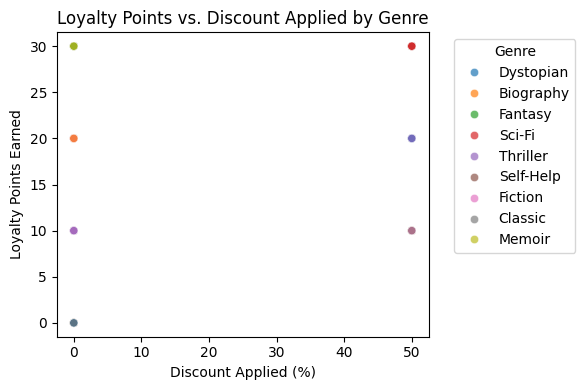

In [ ]:
#@title 3. Visualizing with One‑Hot Encoded Categorical Features { display-mode: "form" }
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3.0 One‑hot encode key categorical variables
categorical_cols = ['Author', 'Genre', 'Purchase Method', 'Payment Method']
encoded_df = pd.get_dummies(data[categorical_cols], drop_first=True)

# Combine numeric and encoded columns
visual_df = pd.concat([data[numeric_cols], encoded_df], axis=1)
print("Encoded DataFrame shape:", visual_df.shape)
print("Sample of encoded features:")
print(encoded_df.head())

# 3.1 Scatter plot: Loyalty Points vs. Discount Applied, colored by Genre
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=data,
    x='Discount Applied',
    y='Loyalty Points',
    hue='Genre',
    palette='tab10',
    alpha=0.7
)
plt.title("Loyalty Points vs. Discount Applied by Genre")
plt.xlabel("Discount Applied (%)")
plt.ylabel("Loyalty Points Earned")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-6-478a88d39aa7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


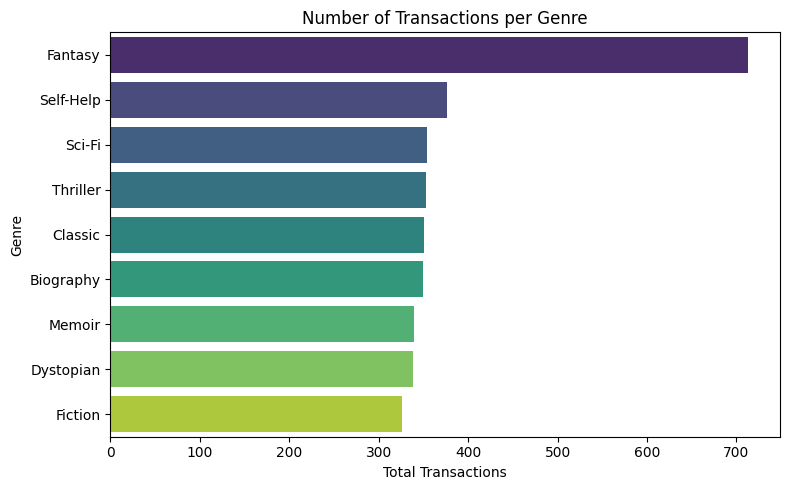

In [ ]:
#@title Bar Chart: Transactions per Genre
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute transaction counts by genre
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'TransactionCount']

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=genre_counts,
    x='TransactionCount',
    y='Genre',
    palette='viridis'
)
plt.title("Number of Transactions per Genre")
plt.xlabel("Total Transactions")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


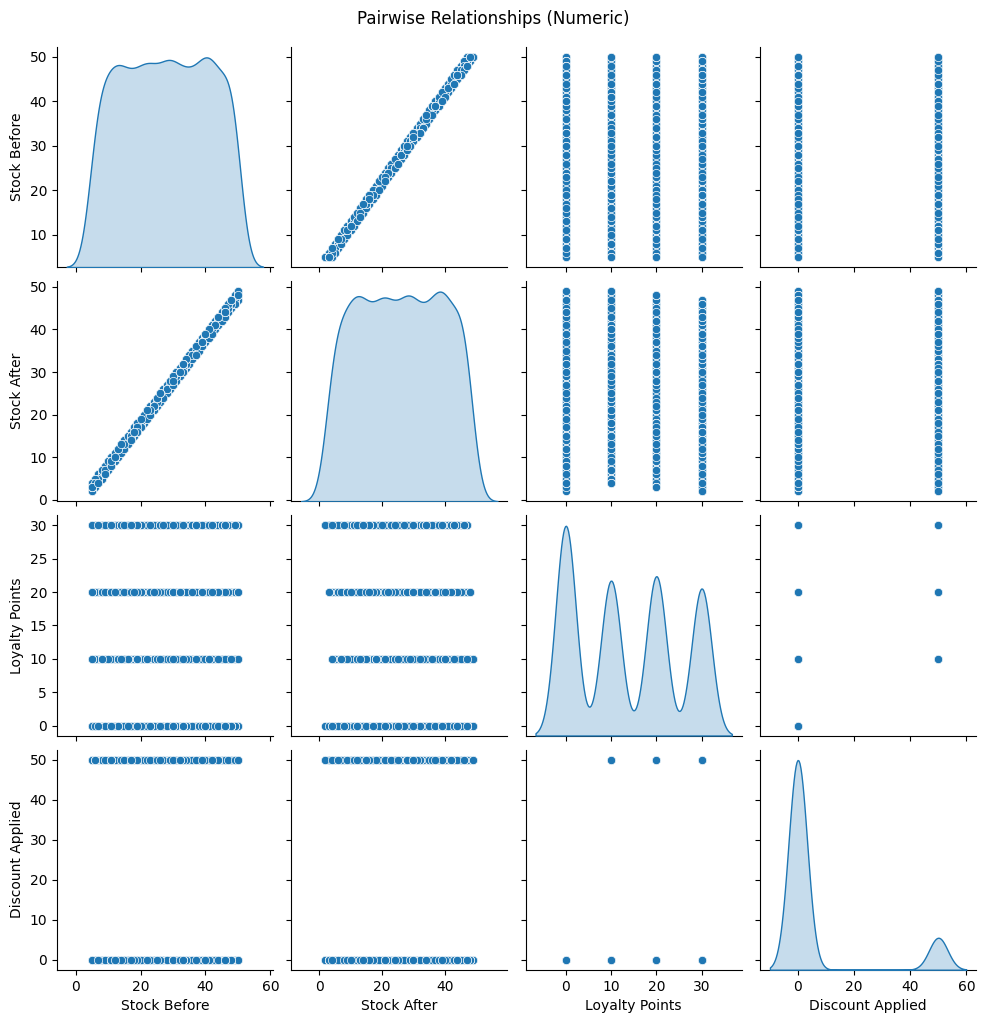

In [ ]:
# cols_for_pair = numeric_cols.tolist() # Remove this line
cols_for_pair = numeric_cols # Use the list directly
sns.pairplot(
    visual_df[cols_for_pair],
    diag_kind='kde'
)
plt.suptitle("Pairwise Relationships (Numeric)", y=1.02)
plt.show()

Sample of one-hot encoded genres:
   Genre_Biography  Genre_Classic  Genre_Dystopian  Genre_Fantasy  \
0            False          False             True          False   
1             True          False            False          False   
2            False          False            False           True   
3            False          False            False          False   
4            False          False            False          False   

   Genre_Fiction  Genre_Memoir  Genre_Sci-Fi  Genre_Self-Help  Genre_Thriller  
0          False         False         False            False           False  
1          False         False         False            False           False  
2          False         False         False            False           False  
3          False         False          True            False           False  
4          False         False          True            False           False  


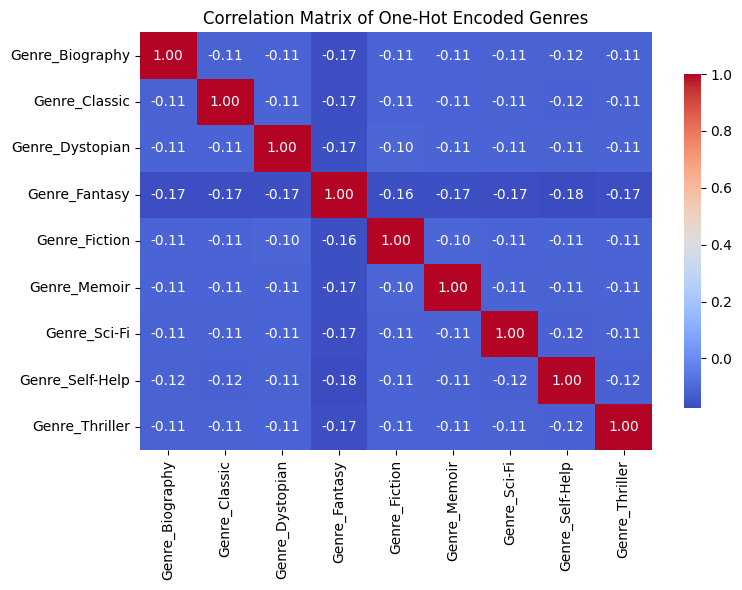

In [ ]:
#@title Correlation Matrix: One-Hot Encoded Genres { display-mode: "form" }
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load data if necessary
url = "https://raw.githubusercontent.com/User13212/GreenFuture-Analytics/main/21118779.csv"
data = pd.read_csv(url)

# One-hot encode the 'Genre' column
genre_dummies = pd.get_dummies(data['Genre'], prefix='Genre')

# Compute correlation matrix among the genre dummy variables
genre_corr = genre_dummies.corr()

# Display sample of encoded genres
print("Sample of one-hot encoded genres:")
print(genre_dummies.head())

# Plot heatmap of genre correlations
plt.figure(figsize=(8, 6))
sns.heatmap(
    genre_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Matrix of One-Hot Encoded Genres")
plt.tight_layout()
plt.show()
